<h1> MinMaxScaled data</h1>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(40)

data = pd.read_csv("../data/our_data.csv")
prep_data = pd.read_csv("../data/our_data_preprocessed_MinMaxScaler.csv")

In [30]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

def count_silhouette_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

def count_calinski_harabasz_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Calinski-Harabasz score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = calinski_harabasz_score(X, labels)
        scores.append(score)
    return scores

def count_davies_bouldin_scores(X, k_max):
    scores = []
    for k in range(2, k_max + 1):  # Davies-Bouldin score nie działa dla k=1
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        score = davies_bouldin_score(X, labels)
        scores.append(score)
    return scores

def show_scores(data, cluster_col):
    print(cluster_col)
    print("Silhouette Score: ", silhouette_score(data.drop(cluster_col, axis=1), data[cluster_col]))
    print("Calinski-Harabasz Score: ", calinski_harabasz_score(data.drop(cluster_col, axis=1), data[cluster_col]))
    print("Davies-Bouldin Score: ", davies_bouldin_score(data.drop(cluster_col, axis=1), data[cluster_col]))

<h1> Dimensionality reduction by PCA <h1>

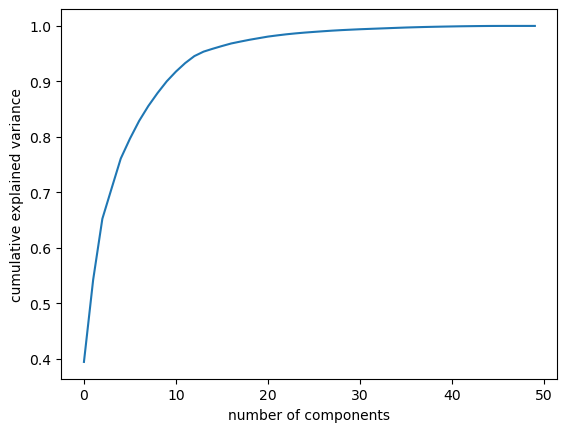

[0.39443188 0.54242377 0.65237494 0.70687949 0.76097967 0.79683632
 0.8288938  0.85577207 0.87909895 0.90021189 0.91777799 0.93301178
 0.94561858 0.95365809 0.95888898 0.96377151 0.96836301 0.97178426
 0.97506135 0.97792731 0.98077822 0.98292046 0.98490684 0.98655416
 0.98799264 0.98922606 0.99041372 0.99151378 0.99245157 0.99324843
 0.99401272 0.99465111 0.99528268 0.99590741 0.99652907 0.99712836
 0.99760741 0.99806076 0.99843377 0.99877416 0.99907614 0.99937187
 0.99957733 0.99976933 0.99990951 0.99997406 1.         1.
 1.         1.        ]


In [31]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=50)
pca.fit(prep_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))

We will use 4 pca components, they contain  80% of all information. We have tried the same with 10 and 6 pca components and it was bad.

In [32]:
pca = PCA(n_components=4)

pca_data = pca.fit_transform(prep_data)

pca_data = pd.DataFrame(pca_data, columns=["PC1", "PC2", "PC3", "PC4"])

### Searching for the best number of clusters

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

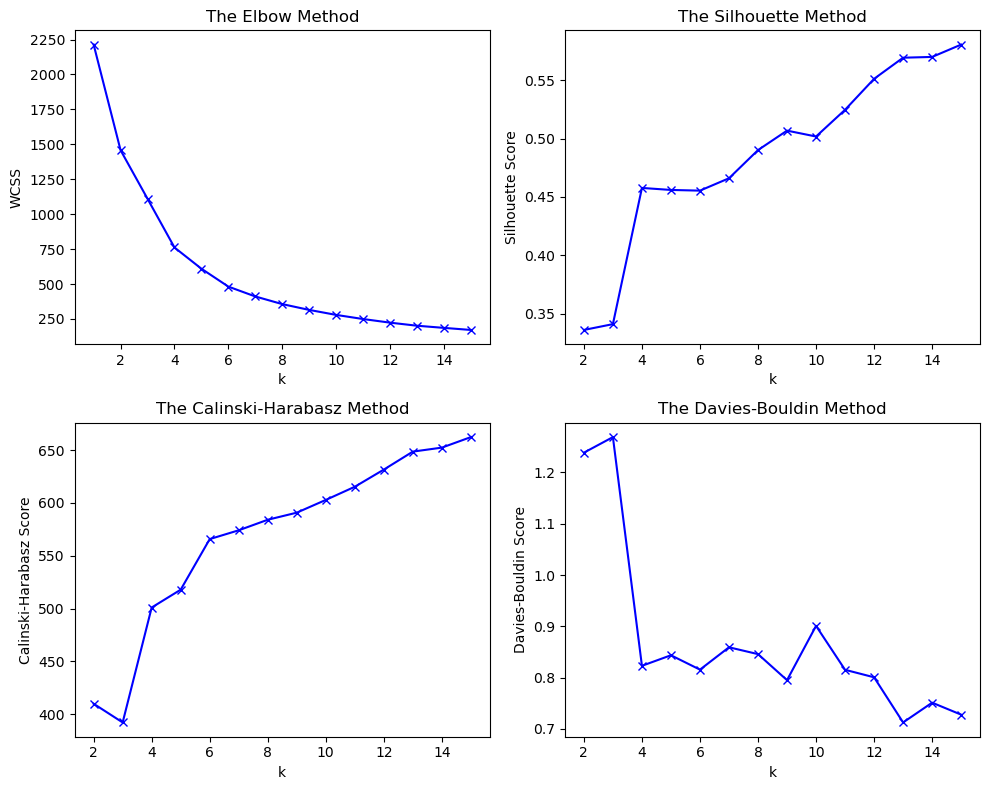

In [33]:
k_max = 15
wcss_vec = count_wcss_scores(pca_data, k_max)
silhouette_vec = count_silhouette_scores(pca_data, k_max)
calinski_harabasz_vec = count_calinski_harabasz_scores(pca_data, k_max)
davies_bouldin_vec = count_davies_bouldin_scores(pca_data, k_max)

x_ticks_wcss = list(range(1, len(wcss_vec) + 1))
x_ticks_silhouette = list(range(2, len(silhouette_vec) + 2))
x_ticks_calinski_harabasz = list(range(2, len(calinski_harabasz_vec) + 2))
x_ticks_davies_bouldin = list(range(2, len(davies_bouldin_vec) + 2))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

#wcss
axs[0, 0].plot(x_ticks_wcss, wcss_vec, 'bx-')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('WCSS')
axs[0, 0].set_title('The Elbow Method')

#silhouette
axs[0, 1].plot(x_ticks_silhouette, silhouette_vec, 'bx-')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Silhouette Score')
axs[0, 1].set_title('The Silhouette Method')

#Calinski-Harabasz
axs[1, 0].plot(x_ticks_calinski_harabasz, calinski_harabasz_vec, 'bx-')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Calinski-Harabasz Score')
axs[1, 0].set_title('The Calinski-Harabasz Method')

#Davies-Bouldin
axs[1, 1].plot(x_ticks_davies_bouldin, davies_bouldin_vec, 'bx-')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('Davies-Bouldin Score')
axs[1, 1].set_title('The Davies-Bouldin Method')

plt.tight_layout()
plt.show()

the best number of clusters here is definetely 15

<h1> KMeans </h1>

In [34]:
from sklearn.cluster import KMeans

if 'cluster' in pca_data.columns:
    pca_data = pca_data.drop('cluster', axis=1)

kmeans  = KMeans(n_clusters=15, random_state=0)

pca_data['cluster'] = kmeans.fit_predict(pca_data)
data['cluster'] = pca_data['cluster']

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
show_scores(pca_data, 'cluster')

cluster
Silhouette Score:  0.5804090013023492
Calinski-Harabasz Score:  662.3828426592688
Davies-Bouldin Score:  0.7278518663897315


In [36]:
pca_data['cluster'].value_counts()

5     133
8      89
0      85
7      70
6      70
2      54
1      50
10     44
9      42
11     41
4      32
3      27
14     25
13     23
12      7
Name: cluster, dtype: int64

plot with pca

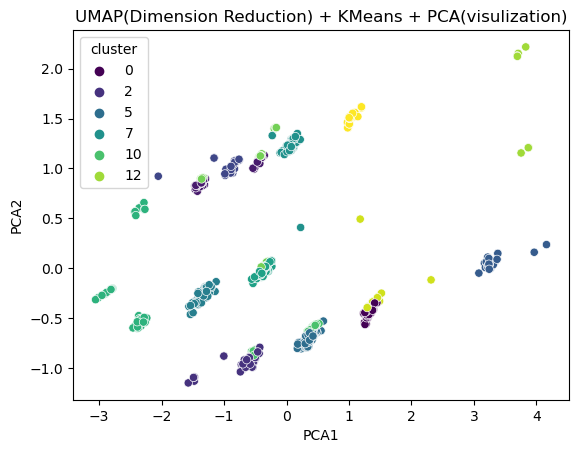

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + KMeans + PCA(visulization)')
plt.show()

plot with t-sne

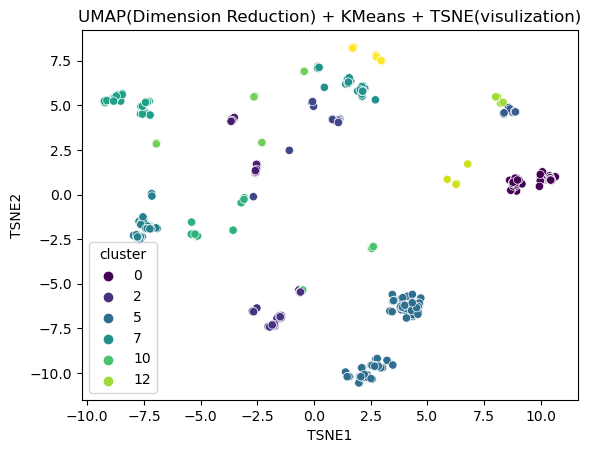

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=80, n_iter=300)
data_tsne = tsne.fit_transform(pca_data.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + KMeans + TSNE(visulization)')
plt.show()

plot with Multidimensional Scaling (MDS)

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


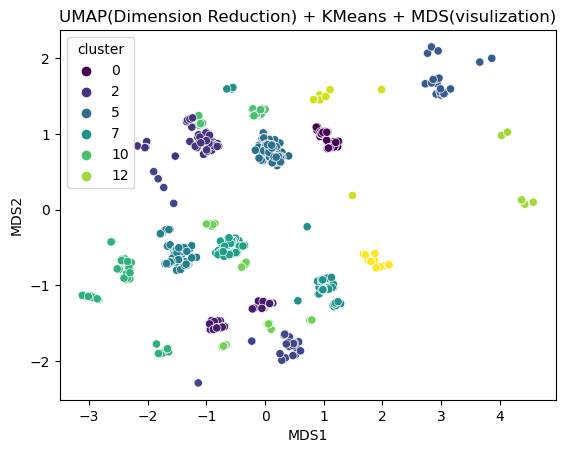

In [39]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(pca_data.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + KMeans + MDS(visulization)')
plt.show()

<h1> Agglomerative Clustering </h1>

In [47]:
from sklearn.cluster import AgglomerativeClustering

if 'cluster' in pca_data.columns:
    pca_data = pca_data.drop('cluster', axis=1)

agg = AgglomerativeClustering(n_clusters=15)

pca_data['cluster'] = agg.fit_predict(pca_data)
data['cluster'] = pca_data['cluster']

In [48]:
show_scores(pca_data, 'cluster')

cluster
Silhouette Score:  0.5813209156613357
Calinski-Harabasz Score:  670.9613417196216
Davies-Bouldin Score:  0.7827279119002203


In [49]:
pca_data['cluster'].value_counts()

8     133
9      88
7      85
2      75
5      63
13     58
1      57
6      41
11     39
0      34
3      31
12     29
10     25
4      25
14      9
Name: cluster, dtype: int64

plot with pca

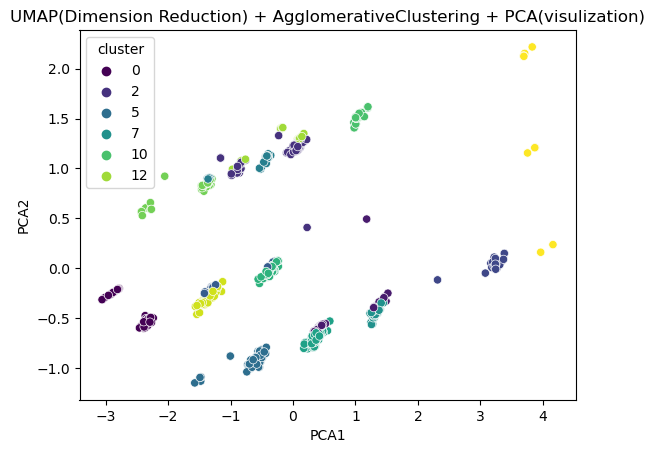

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + AgglomerativeClustering + PCA(visulization)')
plt.show()

plot with t-sne

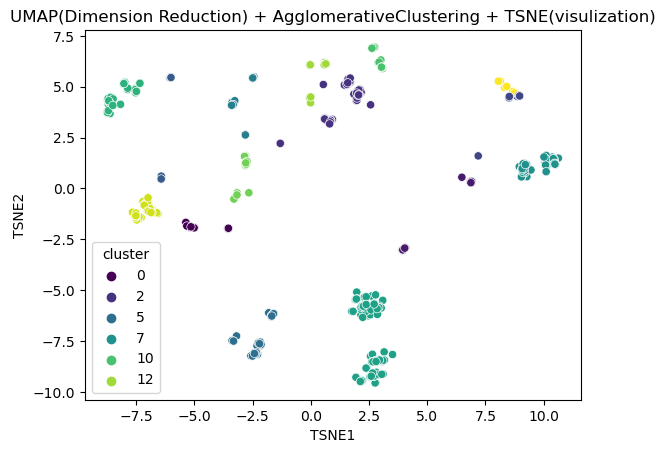

In [51]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=90, n_iter=300)
data_tsne = tsne.fit_transform(pca_data.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + AgglomerativeClustering + TSNE(visulization)')
plt.show()

plot with mds

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


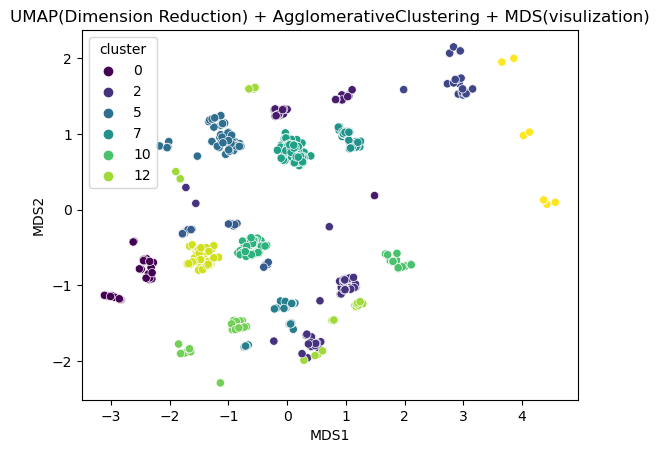

In [52]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(pca_data.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + AgglomerativeClustering + MDS(visulization)')
plt.show()


<h1> DBSCAN </h1>

In [53]:
import optuna
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import numpy as np

np.random.seed(42)

if 'cluster' in pca_data.columns:
    pca_data = pca_data.drop('cluster', axis=1)

def objective(trial):
    eps = trial.suggest_loguniform('eps', 0.001, 1.0)
    min_samples = trial.suggest_int('min_samples', 2, 10)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(pca_data)
    
    if len(set(cluster_labels)) > 1:
        silhouette = silhouette_score(df_pca, cluster_labels)
        calinski = calinski_harabasz_score(df_pca, cluster_labels)
        
        score = 0.5 * silhouette + 0.5 * calinski
    else:
        score = -1  
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print(f'Best parameters: {study.best_params}')
print(f'Best score: {study.best_value}')

best_params = study.best_params

dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
cluster_labels = dbscan.fit_predict(pca_data)
pca_data['cluster'] = cluster_labels
data['cluster'] = cluster_labels

if len(set(cluster_labels)) == 1:
    print("Only one cluster formed. Adjust clustering parameters.")


[I 2024-05-30 03:24:51,689] A new study created in memory with name: no-name-fc30e88b-b418-4ca0-8195-441324b31141
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_87211/363776280.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  eps = trial.suggest_loguniform('eps', 0.001, 1.0)
[I 2024-05-30 03:24:51,728] Trial 0 finished with value: 219.44083717526345 and parameters: {'eps': 0.5859803736547126, 'min_samples': 4}. Best is trial 0 with value: 219.44083717526345.
/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_87211/363776280.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  eps = trial.suggest_loguniform('eps', 0.001, 1.0)
[I 2024-05-30 03:24:5

Best parameters: {'eps': 0.6253860677618569, 'min_samples': 2}
Best score: 942.3988266665301


In [54]:
show_scores(pca_data, 'cluster')

cluster
Silhouette Score:  0.7149647570898723
Calinski-Harabasz Score:  817.9919045492985
Davies-Bouldin Score:  1.0355568878810633


In [55]:
pca_data['cluster'].value_counts()

 1     133
 10     88
 0      85
 3      58
 2      54
 5      41
 17     35
 7      30
 18     25
 16     23
 20     21
 14     20
 25     20
 24     20
 23     18
 11     17
 13     13
 9      12
 28     12
 15     12
 6       9
 4       8
 19      8
 21      6
 26      5
-1       5
 22      4
 8       2
 27      2
 12      2
 29      2
 30      2
Name: cluster, dtype: int64

plot with pca

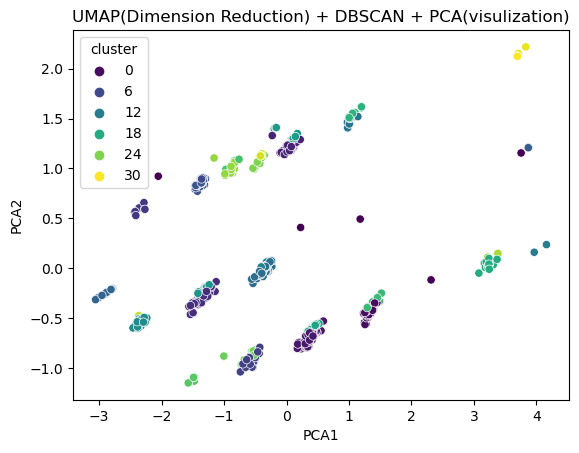

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + DBSCAN + PCA(visulization)')
plt.show()

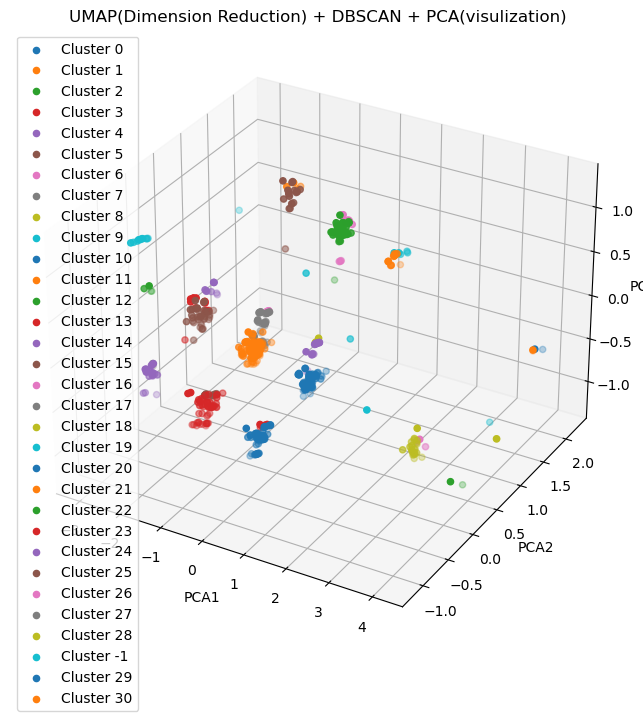

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

df_pca['cluster'] = pca_data['cluster']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in df_pca['cluster'].unique():
    df_cluster = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(df_cluster['PCA1'], df_cluster['PCA2'], df_cluster['PCA3'], label=f'Cluster {cluster}')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('UMAP(Dimension Reduction) + DBSCAN + PCA(visulization)')
plt.legend()


plot with t-sne

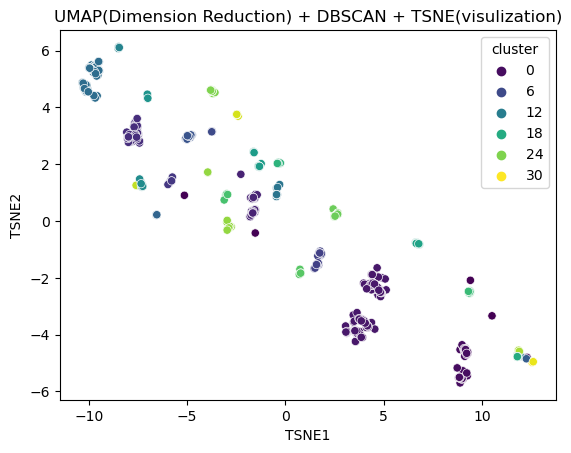

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=120, n_iter=300)
data_tsne = tsne.fit_transform(pca_data.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + DBSCAN + TSNE(visulization)')
plt.show()


plot with mds

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


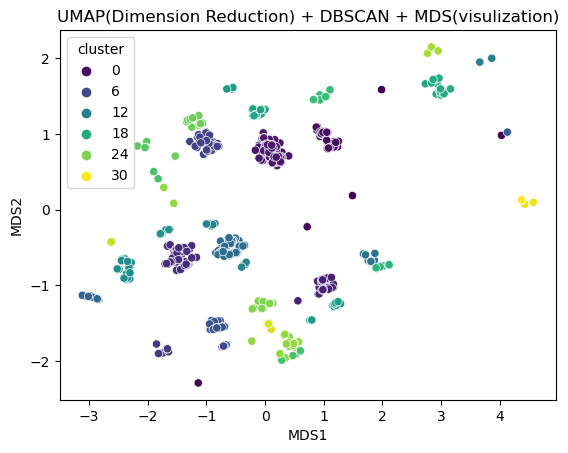

In [59]:
from sklearn.manifold import MDS   

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(pca_data.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + DBSCAN + MDS(visulization)')
plt.show()

plot with isomap

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 39 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. l

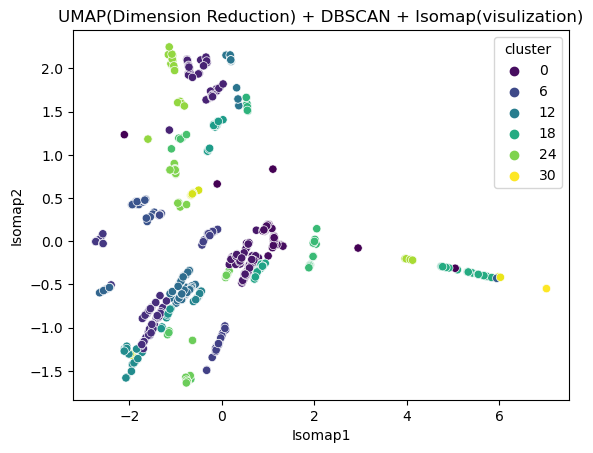

In [60]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=5)
data_isomap = isomap.fit_transform(pca_data.drop('cluster', axis=1))

df_isomap = pd.DataFrame(data=data_isomap, columns=['Isomap1', 'Isomap2'])

df_isomap['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_isomap, x='Isomap1', y='Isomap2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + DBSCAN + Isomap(visulization)')
plt.show()

<h1>Gaussian Mixture Models (GMM) </h1>

In [61]:
prep_data  =pd.read_csv("../data/our_data_preprocessed_MinMaxScaler.csv")

In [65]:
from sklearn.mixture import GaussianMixture
import numpy as np

if 'cluster' in pca_data.columns:
    pca_data = pca_data.drop('cluster', axis=1)

gmm = GaussianMixture(n_components=15, random_state=0)

pca_data['cluster'] = gmm.fit_predict(pca_data)
data['cluster'] = pca_data['cluster']

In [66]:
show_scores(pca_data, 'cluster')

cluster
Silhouette Score:  0.5338166358155744
Calinski-Harabasz Score:  593.5491906699167
Davies-Bouldin Score:  0.7565348977729602


In [67]:
pca_data['cluster'].value_counts()

2     133
6      93
8      85
0      72
11     63
13     59
1      58
7      55
3      41
9      32
14     29
12     25
5      21
10     19
4       7
Name: cluster, dtype: int64

plot with pca

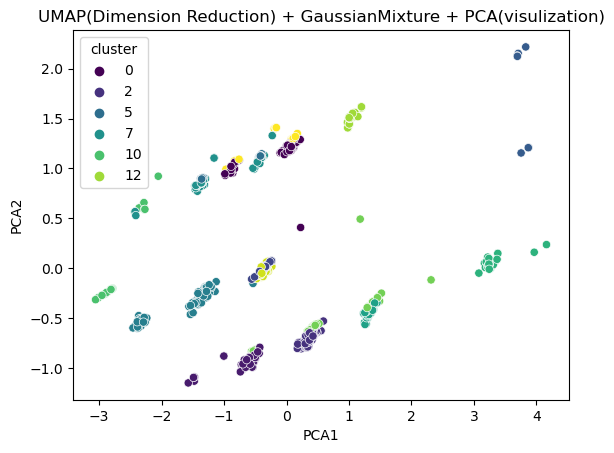

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + GaussianMixture + PCA(visulization)')
plt.show()

plot with t-sne

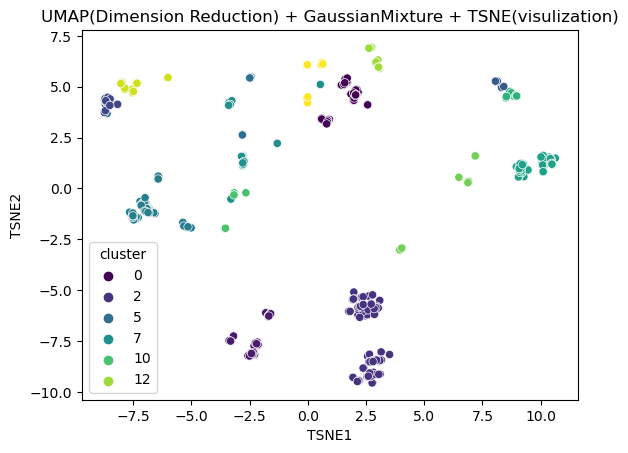

In [69]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=90, n_iter=300)
data_tsne = tsne.fit_transform(pca_data.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + GaussianMixture + TSNE(visulization)')
plt.show()


plot with mds

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


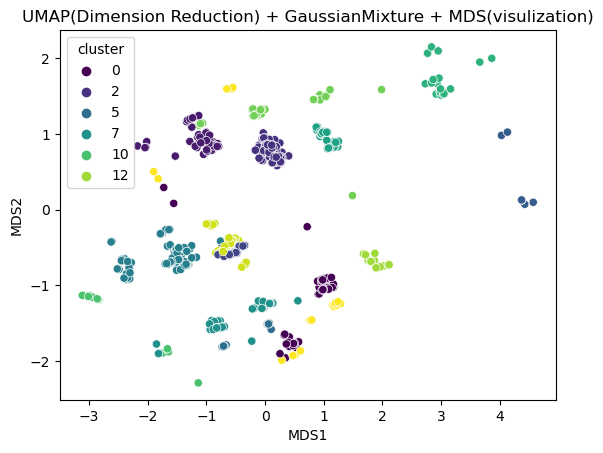

In [70]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(pca_data.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + GaussianMixture + MDS(visulization)')
plt.show()


<h1> Spectral Clustering</h1>

In [71]:
from sklearn.cluster import SpectralClustering

if 'cluster' in pca_data.columns:
    pca_data = pca_data.drop('cluster', axis=1)

sc = SpectralClustering(n_clusters=15, random_state=42, affinity='poly', n_init=100)

pca_data['cluster'] = sc.fit_predict(pca_data)
data['cluster'] = pca_data['cluster']

In [72]:
show_scores(pca_data, 'cluster')

cluster
Silhouette Score:  0.4494227711921056
Calinski-Harabasz Score:  146.49235865596154
Davies-Bouldin Score:  0.7610000967031856


In [73]:
pca_data['cluster'].value_counts()

3     167
0     133
13     92
8      71
1      46
5      45
14     42
11     40
6      35
12     29
2      21
9      21
10     19
4      18
7      13
Name: cluster, dtype: int64

plot with pca

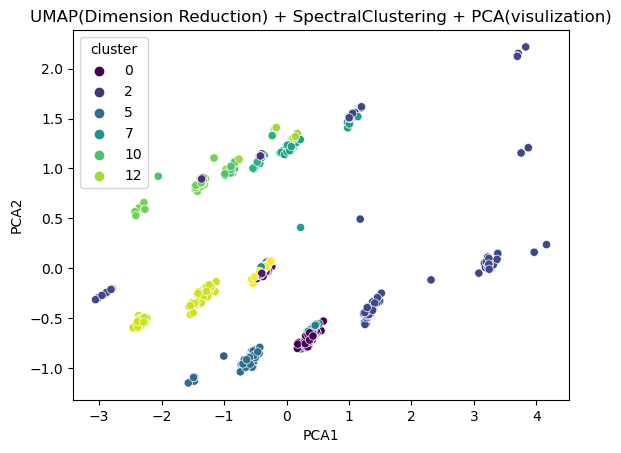

In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(pca_data.drop('cluster', axis=1))

df_pca = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])

df_pca['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + SpectralClustering + PCA(visulization)')
plt.show()


plot with t-sne

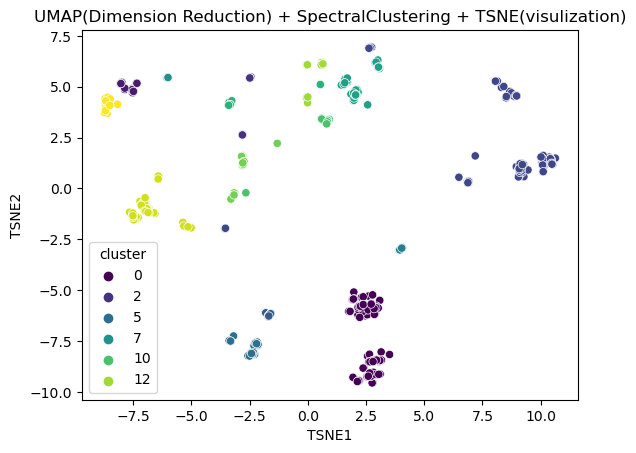

In [75]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, perplexity=90, n_iter=300)
data_tsne = tsne.fit_transform(pca_data.drop('cluster', axis=1))

df_tsne = pd.DataFrame(data=data_tsne, columns=['TSNE1', 'TSNE2'])

df_tsne['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + SpectralClustering + TSNE(visulization)')
plt.show()


plot with mds

/Users/katebokhan/anaconda3/envs/6.86x/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


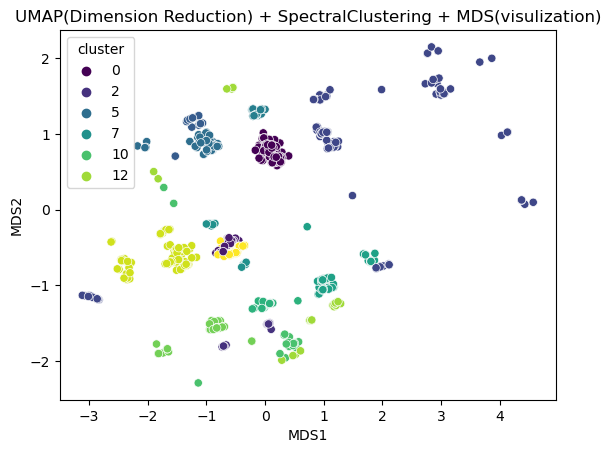

In [76]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
data_mds = mds.fit_transform(pca_data.drop('cluster', axis=1))

df_mds = pd.DataFrame(data=data_mds, columns=['MDS1', 'MDS2'])

df_mds['cluster'] = pca_data['cluster']

sns.scatterplot(data=df_mds, x='MDS1', y='MDS2', hue='cluster', palette='viridis')
plt.title('UMAP(Dimension Reduction) + SpectralClustering + MDS(visulization)')
plt.show()


in general it worked very bad with pca reduction. We have checked 4, 6 and 10 COMPONENTS.